# 0. Dependências

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# 1. Introdução

A __Regressão Logística__, apesar do nome, é uma técnica utilizada para fazer __classificação binária__. Nesse caso, ao invés de prever um valor contínuo, a nossa __saída é composta de apenas dois valores: 0 ou 1__, em geral. Para fazer a regressão logística, utilizamos a função conhecida como __sigmoid__, descrita pela seguinte fórmula:

$$\widehat{y} = \frac{1}{1+e^{-z}} = \frac{e^z}{1+e^z}$$

Onde $z(w,b) = xw^T + b$.

## Função de Custo

A função de custo da regressão logística é chamada de __entropia cruzada__ (do inglês, __cross-entropy__) e é definida pela seguinte fórmula:

$$J(z) = -\frac{1}{N}\sum_{i}^N y_i\log(\widehat{y}_i) + (1-y_i)\log(1-\widehat{y}_i)$$

Onde $N$ é quantidade de amostras e $y_i$ representa o valor da $i$-ésima amostra (0 ou 1). Lembrando que $\widehat{y}_i$ é agora calculada agora utilizando a função ___sigmoid___, como mostrado na seção anterior.

Repare também que:

- quando $y_i = 0$, o primeiro termo anula-se (pois $y_i = 0$). Logo, vamos considerar os dois casos extremos para $\widehat{y}_i = 0$ no segundo termo da equação ($(1-y_i)\log(1-\widehat{y}_i)$):
    - quando $\widehat{y}_i = 0$, temos que o $\log(1-\widehat{y}_i) = \log(1) = 0$. Logo, o nosso custo $J = 0$. Repare que isso faz todo sentido, pois $y_i = 0$ e $\widehat{y}_i = 0$. 
    - quando $\widehat{y}_i = 1$, temos que o $\log(1-\widehat{y}_i) = \log(0) = \infty$. Agora, o nosso custo $J = \infty$. Ou seja, quanto mais diferente são $y_i$ e $\widehat{y}_i$, maior o nosso custo.
- quando $y_i = 1$, o segundo termo anula-se (pois $(1-y_i) = 0$). Novamente, vamos considerar os dois casos extremos para $\widehat{y}_i = 0$, só que agora no primeiro termo da equação ($y_i\log(\widehat{y}_i)$):
    - quando $\widehat{y}_i = 0$, temos que o $\log(\widehat{y}_i) = \infty$. Logo, o nosso custo $J = \infty$. Novamente, como $y_i$ e $\widehat{y}_i$ são bem diferentes, o custo tende a aumentar.
    - quando $\widehat{y}_i = 1$, temos que $\log(\widehat{y}_i) = \log(1) = 0$. Agora, o nosso custo $J = 0$. Novamente, isso faz todo sentido, pois $y_i = 1$ e $\widehat{y}_i = 1$.


## Derivada da Cross-Entropy

Para calcular a derivada da nossa função de custo $J(z)$, primeiramente vamos calcular $\log(\widehat{y}_i)$:

$$\log(\widehat{y}_i) = log\frac{1}{1+e^{-z}} = log(1) - log(1+e^{-z}) = -log(1+e^{-z})$$

E $\log(1-\widehat{y}_i)$:

$$\log(1-\widehat{y}_i) = log \left(1-\frac{1}{1+e^{-z}}\right) = log(e^{-z}) - log(1+e^{-z}) = -z -log(1+e^{-z})$$

Substituindo as duas equações anteriores na fórmula da função de custo, temos:

$$J(z) = -\frac{1}{N}\sum_{i}^N \left[-y_i\log(1+e^{-z}) + (1-y_i)(-z -\log(1+e^{-z}))\right]$$

Efetuando as distribuições, podemos simplificar a equação acima para:

$$J(z) = -\frac{1}{N}\sum_{i}^N \left[y_iz -z -\log(1+e^{-z})\right]$$

Uma vez que:

$$-z -\log(1+e^{-z}) = -\left[\log e^{z} + log(1+e^{-z})\right] = -log(1+e^z)$$

Temos:

$$J(z) = -\frac{1}{N}\sum_{i}^N \left[y_iz -\log(1+e^z)\right]$$

Como a derivada da diferença é igual a diferença das derivadas, podemos calcular cada derivada individualmente em relação a $w$:

$$\frac{\partial}{\partial w_i}y_iz = y_ix_i,\quad \frac{\partial}{\partial w_i}\log(1+e^z) = \frac{x_ie^z}{1+e^z} = x_i \widehat{y}_i$$

e em relação à $b$:

$$\frac{\partial}{\partial b}y_iz = y_i,\quad \frac{\partial}{\partial b}\log(1+e^z) = \frac{e^z}{1+e^z} = \widehat{y}_i$$

Assim, a derivada da nossa função de custo $J(z)$ é:

$$\frac{\partial}{\partial w_i}J(z) = \sum_i^N (y_i - \widehat{y}_i)x_i$$

$$\frac{\partial}{\partial b}J(z) = \sum_i^N (y_i - \widehat{y}_i)$$

Por fim, repare que o __gradiente de J ($\nabla J$) é exatamente o mesmo que o gradiente da função de custo do Perceptron__. Portanto, os pesos serão atualizados da mesma maneira. O que muda é a forma como calculamos $\widehat{y}$ (agora usando a função _sigmoid_) e a função de custo $J$.

# 2. Dados

In [2]:
df = pd.read_csv('data/anuncios.csv')
print(df.shape)
df.head(10)

(400, 3)


,idade,salario,comprou
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [3]:
x, y = df.idade.values.reshape(-1,1), df.comprou.values.reshape(-1,1)

print(x.shape, y.shape)

(400, 1) (400, 1)


Text(0, 0.5, 'comprou?')

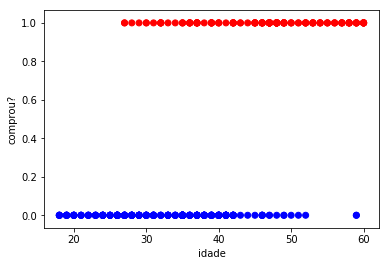

In [4]:
plt.scatter(x, y, c=y, cmap='bwr')
plt.xlabel('idade')
plt.ylabel('comprou?')

In [5]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 0.9999999999999996


# 3. Implementação 

In [6]:
class MyLogisticRegression():
    def __init__(self, lr=1e-2, max_iter=100):
        self.lr = lr
        self.max_iter = max_iter
        self.w = None
        self.b = None
    
    def fit(self, x, y):
        self.w = 2*np.random.random((1, x.shape[1])) - 1
        self.b = 2*np.random.random() - 1
        
        for step in range(self.max_iter):
            z = np.dot(x, self.w.T) + self.b
            y_pred = self.__sigmoid(z)
            error = y - y_pred
            
            self.w = self.w + self.lr*np.dot(error.T, x)
            self.b = self.b + self.lr*error.sum()
    
    def predict(self, x):
        return self.__sigmoid(np.dot(x, self.w.T) + self.b)
    
    def __sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

# 4. Teste 

## 1 variável independente

In [7]:
np.random.seed(42)
clf = MyLogisticRegression(lr=1e-2, max_iter=1000)
clf.fit(x, y)
y_pred = np.where(clf.predict(x) > 0.5, 1, 0)

print('coef_:', clf.w)
print('intercept_:', clf.b)
print('acurácia: {:.2f}%'.format(accuracy_score(y, y_pred)*100))

coef_: [[3.96794211]]
intercept_: -0.6751072093244296
acurácia: 84.00%


### Comparação com o Scikit-Learn

Como a Regressão Logística do _sklearn_ faz uma __regularização L2__ automaticamente, temos de definir $C=10^{15}$ para "anular" a regularização. O parâmetro $C$ define a inversa da força da regularização (ver [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)). __Logo, quanto menor for o $C$, maior será a regularização e menores serão os valores dos pesos e bias.__

In [8]:
np.random.seed(42)
clf_sk = LogisticRegression(C=1e15, max_iter=1000, solver='newton-cg')
clf_sk.fit(x, y.ravel())

print('coef_:', clf_sk.coef_)
print('intercept_:', clf_sk.intercept_)
print('acurácia: {:.2f}%'.format(clf_sk.score(x, y)*100))

coef_: [[3.96794202]]
intercept_: [-0.6751072]
acurácia: 84.00%


Text(0, 0.5, 'comprou?')

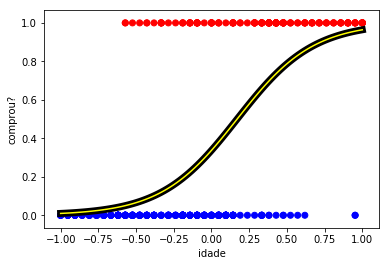

In [9]:
x_test = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_pred_sk = clf_sk.predict_proba(x_test)
y_pred = clf.predict(x_test)

plt.scatter(x, y, c=y, cmap='bwr')
plt.plot(x_test, y_pred_sk[:,1], color='black', linewidth=7.0)
plt.plot(x_test, y_pred, color='yellow')
plt.xlabel('idade')
plt.ylabel('comprou?')

## 2 variáveis independentes

In [10]:
x, y = df[['idade', 'salario']].values, df.comprou.values.reshape(-1,1)

print(x.shape, y.shape)

(400, 2) (400, 1)


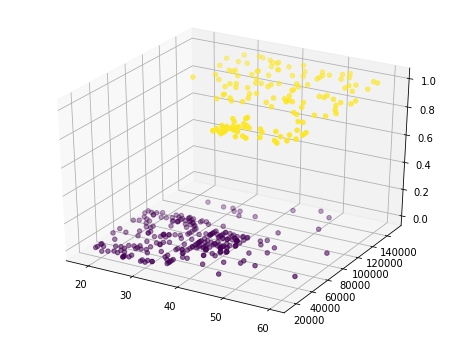

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x[:,0], x[:,1], y, c=y.ravel())

In [12]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 1.0


In [13]:
np.random.seed(42)

clf = MyLogisticRegression(lr=1e-2, max_iter=500)
clf.fit(x, y)
y_pred = np.where(clf.predict(x) > 0.5, 1, 0)

print('coef_:', clf.w)
print('intercept_:', clf.b)
print('acurácia: {:.2f}%'.format(accuracy_score(y, y_pred)*100))

coef_: [[4.90327755 2.42331297]]
intercept_: -0.36607245507256114
acurácia: 84.50%


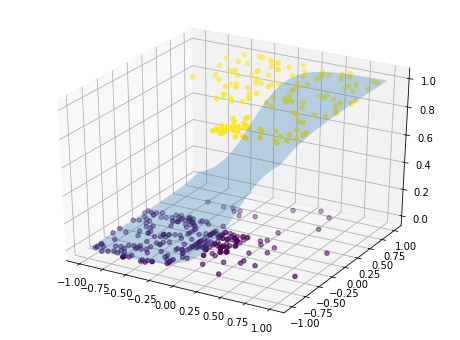

In [14]:
x1 = np.linspace(x[:, 0].min(), x[:, 0].max())
x2 = np.linspace(x[:, 1].min(), x[:, 1].max())
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
x1_mesh = x1_mesh.reshape(-1, 1)
x2_mesh = x2_mesh.reshape(-1, 1)

x_mesh = np.hstack((x1_mesh, x2_mesh))
y_pred = clf.predict(x_mesh)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x[:,0], x[:,1], y, c=y.ravel())
ax.plot_trisurf(x1_mesh.ravel(), x2_mesh.ravel(), y_pred.ravel(), alpha=0.3, shade=False)

### Comparação com o Scikit-Learn

In [15]:
clf_sk = LogisticRegression(C=1e15, max_iter=1000, solver='newton-cg', random_state=42)
clf_sk.fit(x, y.ravel())

print('coef_:', clf_sk.coef_)
print('intercept_:', clf_sk.intercept_)
print('acurácia: {:.2f}%'.format(clf_sk.score(x, y)*100))

coef_: [[4.903271   2.42331008]]
intercept_: [-0.36607242]
acurácia: 84.50%


# Referências

1. [Logistic Regression from Scratch in Python](https://beckernick.github.io/logistic-regression-from-scratch/)
2. [Derivative of cost function for logistic Regression](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression)